In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import os

In [2]:
def make_linegraph(df, title="", filename=None):
    ax = sns.lineplot(df, x=np.arange(df.shape[0]) + 1, y="scores", color="#cc0000", linewidth=2, marker="o", label="reconstruction")
    sns.lineplot(df, x=np.arange(df.shape[0]) + 1, y="baselines", color="#666", linewidth=2, marker="o", linestyle="dashed", label="baseline")
    plt.legend(loc="lower right")
    plt.ylim(-.02, 1.02)
    plt.xlim(.5, 35.5)
    plt.yticks(fontsize=14)
    plt.yticks(np.arange(0, 11) / 10, fontsize=14)
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))
    plt.xticks(fontsize=14)
    plt.xlabel("Sequence", fontsize=18)
    plt.ylabel("Proportion matching", fontsize=18)
    plt.title(title, fontsize=20, fontweight="bold")
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")
    plt.show()

def make_position_graph(df, title="", filename=None):
    plt.figure(figsize=(10, 1))
    sns.heatmap(df.values.T, cmap="autumn_r", cbar_kws={"label": "Proportion\nmatching"}, yticklabels=["reconstruction", "baseline"])#, vmin=0, vmax=1)
    plt.yticks(fontsize=14)
    plt.xticks(np.arange(60) + .5, [""] * 60, fontsize=14)
    plt.xlabel("Sequence position", fontsize=18)
    plt.title(title, fontsize=20, fontweight="bold")
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")
    plt.show()

def make_linegraph_log(df, title="", filename=None):
    seq_lens = [8, 16, 32, 48, 64, 96, 128, 144, 192, 240, 256, 288]
    ax = sns.lineplot(df, x=seq_lens, y="scores", color="purple", linewidth=2, marker="o", label="reconstruction")
    sns.lineplot(df, x=seq_lens, y="baselines", color="#666", linewidth=2, marker="o", linestyle="dashed", label="baseline")
    plt.legend(loc="lower right")
    plt.ylim(-.02, 1.02)
    plt.yticks(np.arange(0, 11) / 10, fontsize=14)
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))
    plt.xticks(seq_lens, [str(x) for x in seq_lens], fontsize=8)
    ax.tick_params(axis="x", which="minor", bottom=False)
    plt.xlabel("Sequence length", fontsize=18)
    plt.ylabel("Proportion matching", fontsize=18)
    plt.title(title, fontsize=20, fontweight="bold")
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")
    plt.show()

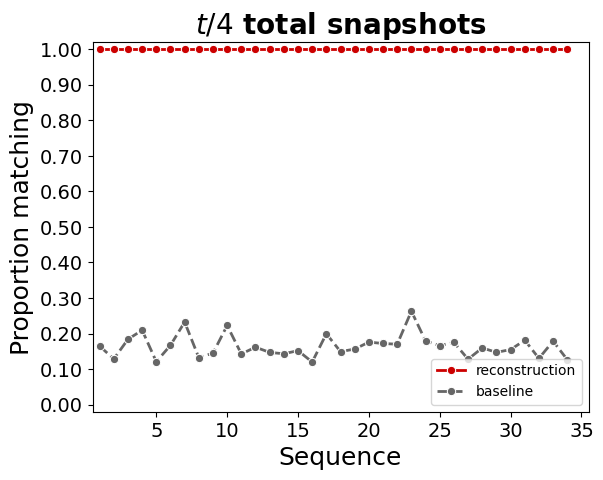

In [3]:
df4 = pd.read_csv("scores_sr_4.csv").iloc[1:, :]
make_linegraph(df4, title="$t/4$ total snapshots", filename="plot_sr4.pdf")

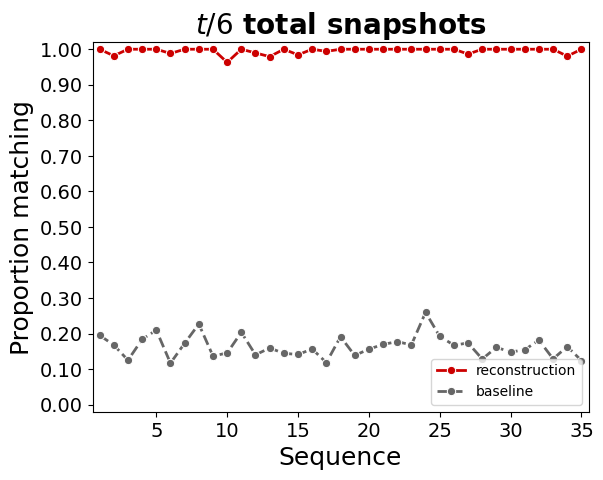

In [4]:
df6 = pd.read_csv("scores_sr_6.csv")
make_linegraph(df6, title="$t/6$ total snapshots", filename="plot_sr6.pdf")

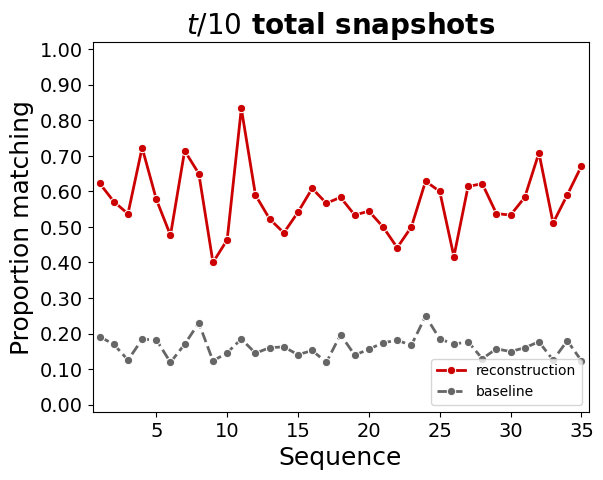

In [5]:
df15 = pd.read_csv("scores_sr_10.csv")
make_linegraph(df15, title="$t/10$ total snapshots", filename="plot_sr10.pdf")

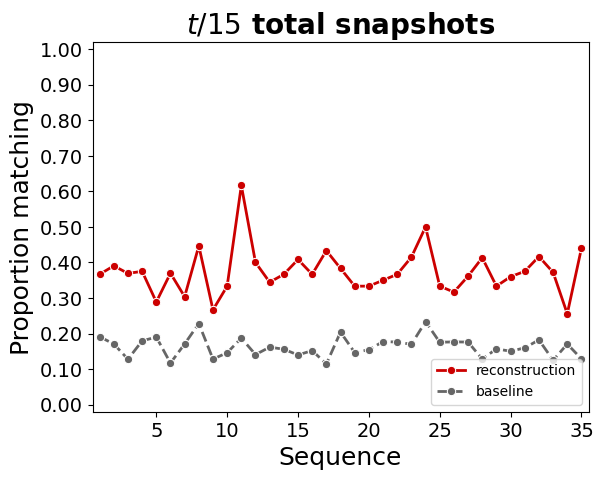

In [6]:
df15 = pd.read_csv("scores_sr_15.csv")
make_linegraph(df15, title="$t/15$ total snapshots", filename="plot_sr15.pdf")

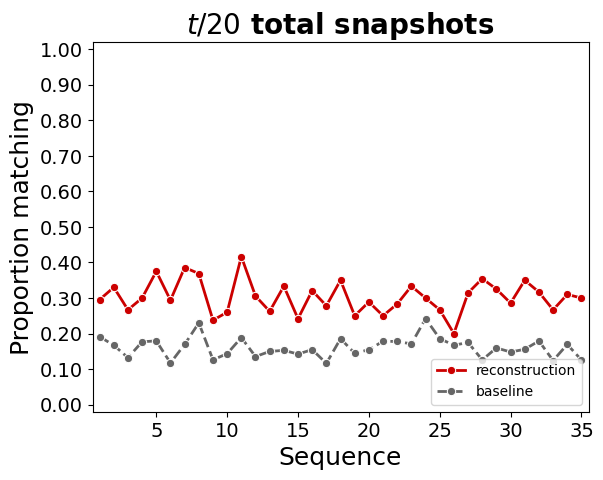

In [7]:
df20 = pd.read_csv("scores_sr_20.csv")
make_linegraph(df20, title="$t/20$ total snapshots", filename="plot_sr20.pdf")

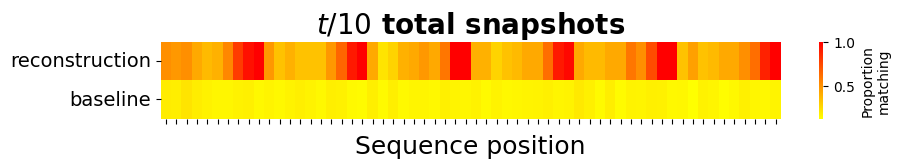

In [8]:
df10 = pd.read_csv("scores_by_position_10.csv")
make_position_graph(df10, title="$t/10$ total snapshots", filename="plot_pos_10.pdf")

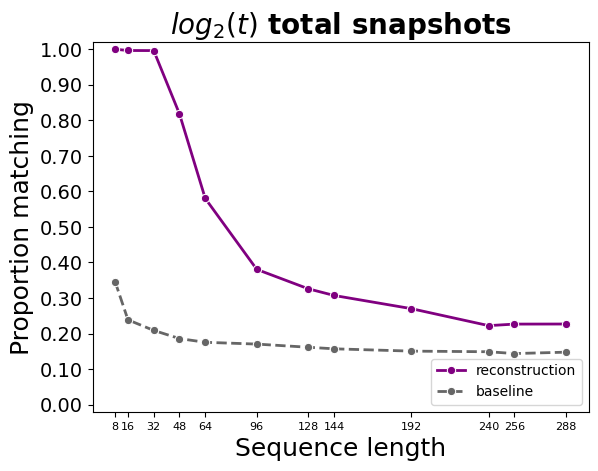

In [9]:
df_log = pd.read_csv("scores_var.csv")#.iloc[1:, :]
make_linegraph_log(df_log, title="$log_2(t)$ total snapshots", filename="plot_log2.pdf")